In [264]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.__version__

'0.23.4'

In [255]:
#read csv files
multiplechoice_orig = pd.read_csv('kaggle-survey-2018/multipleChoiceResponses.csv', header = [0, 1])
multiplechoice_orig.columns = multiplechoice_orig.columns.droplevel(1)

C:\Users\ravi_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (157,172,174,210,218,219,246,368,371,384,389,390,391,393) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
multiplechoice_orig.head()
multiplechoice_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 0 to 23858
Columns: 395 entries, (Time from Start to Finish (seconds), Duration (in seconds)) to (Q50_OTHER_TEXT, What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text)
dtypes: float64(14), int64(36), object(345)
memory usage: 71.9+ MB


In [35]:
multiplechoice_orig.describe(include = 'all')

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text
count,23859.000000,23859,23859.000000,23859,23859,23438,22947,22900,23859.000000,21685,...,23859.000000,1371,6478,2674,2104,3569,1059,2500,520,23859.000000
unique,NaN,4,NaN,12,58,7,13,21,NaN,19,...,NaN,1,1,1,1,1,1,1,1,NaN
top,NaN,Male,NaN,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,NaN,Computers/Technology,...,NaN,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,NaN
freq,NaN,19430,NaN,6159,4716,10855,9430,5253,NaN,5584,...,NaN,1371,6478,2674,2104,3569,1059,2500,520,NaN
mean,12112.764617,NaN,-0.886542,NaN,NaN,NaN,NaN,NaN,17.326963,NaN,...,-0.402364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.589589
std,47208.641461,NaN,2.243926,NaN,NaN,NaN,NaN,NaN,97.431209,NaN,...,8.160236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.891474
min,16.000000,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
25%,570.000000,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
50%,1021.000000,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,...,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000


In [30]:
multiplechoice_orig.describe(include = ['O'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,What is your current yearly compensation (approximate $USD)?,Does your current employer incorporate machine learning methods into their business?,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Selected Choice - None/I do not make my work easy for others to reproduce,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other
count,23859,23859,23859,23438,22947,22900,21685,21101,20185,20669,...,985,244,1371,6478,2674,2104,3569,1059,2500,520
unique,4,12,58,7,13,21,19,11,19,6,...,1,1,1,1,1,1,1,1,1,1
top,Male,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...,We are exploring ML methods (and may one day p...,...,None/I do not make my work easy for others to ...,Other,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other
freq,19430,6159,4716,10855,9430,5253,5584,5898,4756,4688,...,985,244,1371,6478,2674,2104,3569,1059,2500,520


In [134]:
Q35_Part_1 = multiplechoice_orig['Q35_Part_1']
Q35_Part_2 = multiplechoice_orig['Q35_Part_2']
Q35_Part_3 = multiplechoice_orig['Q35_Part_3']
Q35_Part_4 = multiplechoice_orig['Q35_Part_4']
Q35_Part_5 = multiplechoice_orig['Q35_Part_5']
Q35_Part_6 = multiplechoice_orig['Q35_Part_6']


q35_selftaught = Q35_Part_1.sum()
q35_onlinecourses= Q35_Part_2.sum()
q35_work = Q35_Part_3.sum()
q35_university= Q35_Part_4.sum()
q35_kaggle= Q35_Part_5.sum()
q35_other= Q35_Part_6.sum()



In [135]:
#print(q35_selftaught, q35_onlinecourses, q35_work, q35_university, q35_kaggle, q35_other)
#To find percentage of each category for respondents
category_learning = q35_selftaught
category_learning = category_learning.append(q35_onlinecourses)
category_learning = category_learning.append(q35_work)
category_learning = category_learning.append(q35_university)
category_learning = category_learning.append(q35_kaggle)
category_learning = category_learning.append(q35_other)

category_learning = np.array(category_learning)
category_learning

#finding the total percentage and dividing sum by total percentages to standardize percentages(total = 1.0)
total_learning_percentage = category_learning.sum(axis = 0)
total_learning_percentage

category_learning = category_learning / total_learning_percentage
category_learning = category_learning * 100

([<matplotlib.axis.XTick at 0x1e3a2134358>,
 <a list of 6 Text xticklabel objects>)

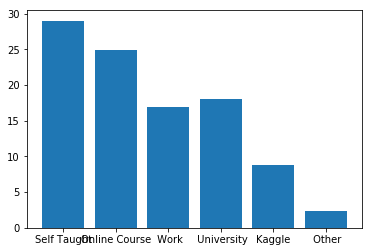

In [136]:
columns1 = ("Self Taught", "Online Course", " Work", " University", "Kaggle", " Other")
x=  np.arange(len(category_learning))
plt.bar(x, category_learning)

plt.xticks(x, columns1)

{'boxes': [<matplotlib.lines.Line2D at 0x1e3974cba90>],
 'caps': [<matplotlib.lines.Line2D at 0x1e3974d44e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e3974de198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e3974d4d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e3974cbbe0>,
  <matplotlib.lines.Line2D at 0x1e3974d40b8>]}

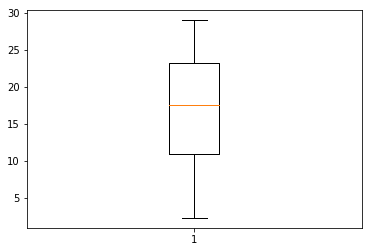

In [145]:
Q35 = pd.concat([Q35_Part_1, Q35_Part_2, Q35_Part_3, Q35_Part_4, Q35_Part_5, Q35_Part_6])
Q35.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143154 entries, 0 to 23858
Data columns (total 6 columns):
What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions                            15745 non-null float64
What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Online courses (Coursera, Udemy, edX, etc.)    15745 non-null float64
What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other                                          15745 non-null float64
What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Self-taught                                    15745 non-null float64
What percentage of your current machine learning/data science training falls under each cat

C:\Users\ravi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


C:\Users\ravi_\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
C:\Users\ravi_\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[[Text(0,0,'Self Taught'),
  Text(0,0,'Online Course'),
  Text(0,0,'Work'),
  Text(0,0,'University'),
  Text(0,0,'Kaggle'),
  Text(0,0,'Other')]]

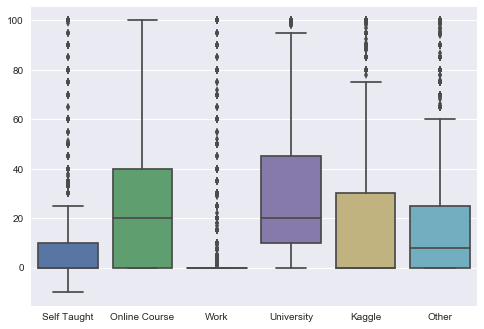

In [149]:
ax = sns.boxplot(Q35, )
ax.set(xticklabels = ['Self Taught', 'Online Course', 'Work', 'University', 'Kaggle', 'Other'])

In [78]:
category_learning

array([29.00391661, 24.89105602, 16.89524719, 18.07047679,  8.85567907,
        2.28362433])

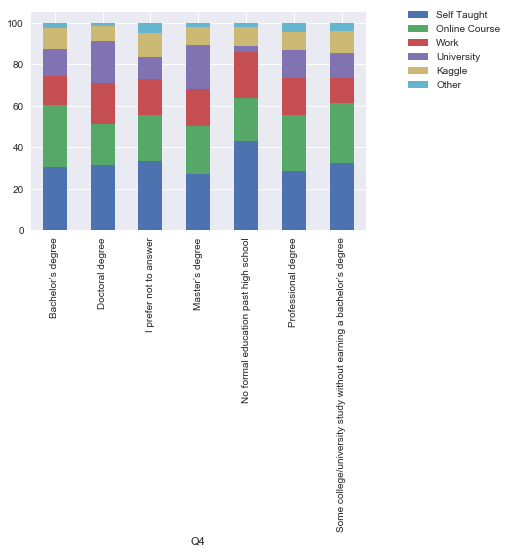

In [257]:
 degree_learning = multiplechoice_orig[['Q4', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna()

#degree_learning.columns = degree_learning.columns.droplevel(1) 
degree_learning_grouped = degree_learning.groupby('Q4').mean()
degree_learning_grouped.rename(columns = {'Q35_Part_1' : 'Self Taught', 'Q35_Part_2' : 'Online Course', 'Q35_Part_3': 'Work', 'Q35_Part_4': 'University', 'Q35_Part_5': 'Kaggle', 'Q35_Part_6': 'Other'}, inplace = True)
ax = degree_learning_grouped.plot.bar(stacked = True)
ax.legend(bbox_to_anchor=(1.1, 1.05))



In [444]:
profession_industry = multiplechoice_orig[['Q6', 'Q7']].dropna()
profession_industry = profession_industry.loc[profession_industry['Q6'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer', 'Software Engineer', 'Statistician', 'DBA/Database Engineer', 'Research Scientist', 'Research Assistant', 'Student'])]
profession_industry.replace({'Research Scientist' : 'Research', 'Research Assistant': 'Research', 'DBA/Database Engineer' : 'Data Engineer', 'I am a student': 'Academics/Education'}, inplace = True)
#(df.loc[df['B'].isin(['one','three'])])
profession_industry_group = profession_industry.groupby(['Q6', 'Q7']).size()
profession_industry_group.reset_index()
profession_industry_group = pd.DataFrame(profession_industry_group.reset_index())
profession_industry_group.rename(columns = {'0': 'Count of Responders'}, inplace = True)
profession_industry_group.sort_values([0], ascending = False)
#profession_industry_group[profession_industry_group['Q6'] == 'Research']



,Q6,Q7,0
107,Student,Academics/Education,4451
75,Software Engineer,Computers/Technology,1584
39,Data Scientist,Computers/Technology,1265
54,Research,Academics/Education,1079
36,Data Scientist,Academics/Education,521
110,Student,Computers/Technology,413
3,Data Analyst,Computers/Technology,412
37,Data Scientist,Accounting/Finance,373
21,Data Engineer,Computers/Technology,332
0,Data Analyst,Academics/Education,324


[Text(0,0,'Data Scientist'),
 Text(0,0,'Research Assistant'),
 Text(0,0,'Data Analyst'),
 Text(0,0,'Student'),
 Text(0,0,'Research Scientist'),
 Text(0,0,'Data Engineer'),
 Text(0,0,'Statistician'),
 Text(0,0,'DBA/Database Engineer')]

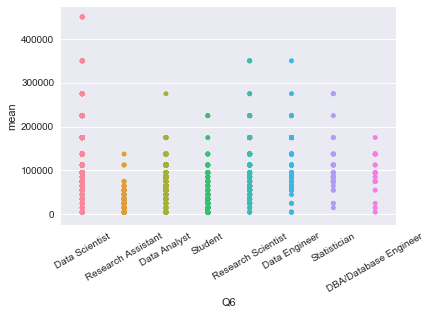

In [443]:
#salary of responders from USD
profession_salary = multiplechoice_orig[multiplechoice_orig['Q3'] == 'United States of America'][['Q6', 'Q9']].dropna()

profession_salary.dropna(inplace = True)
profession_salary = profession_salary[profession_salary['Q9'] != 'I do not wish to disclose my approximate yearly compensation']
profession_salary = profession_salary.loc[profession_salary['Q6'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer', ' Software Engineer', 'Statistician', 'DBA/Database Engineer', 'Research Scientist', 'Research Assistant', 'Student'])]
#profession_salary.replace({'Research Scientist' : 'Research', 'Research Assistant': 'Research', 'DBA/Database Engineer' : 'Data Engineer', 'I am a student': 'Academics/Education'}, inplace = True)

profession_salary['Q9'] = profession_salary['Q9'].apply(lambda x : x.replace('-', '000-'))
profession_salary['Q9'] = profession_salary['Q9'].apply(lambda x : x.replace(',', ''))
profession_salary['Q9'] = profession_salary['Q9'].apply(lambda x : x.replace('+', ''))
#profession_salary[['lower', 'upper']] = pd.DataFrame(profession_salary.Q9.values.tolist())
#profession_salary['Q9'].astype(float)
profession_salary['Q9'] = profession_salary['Q9'].apply(lambda x : x.split('-'))
profession_salary[['lower', 'upper']] = profession_salary['Q9'].apply(pd.Series)
profession_salary.dropna(inplace = True)
#profession_salary[['upper']].values
#profession_salary.loc[profession_salary['upper'].notnull(), 'upper'] = profession_salary.loc[profession_salary['upper'].notnull(), 'upper'].apply(int)
profession_salary['lower'] = pd.to_numeric(profession_salary['lower'])
#profession_salary['upper'].astype(int)
profession_salary['upper'] = pd.to_numeric(profession_salary['upper'])
profession_salary['mean'] = profession_salary['lower'] * 0.5 + profession_salary['upper'] * 0.5
profession_salary.drop(['lower', 'upper', 'Q9'], axis = 1, inplace = True)
#profession_salary_group = profession_salary.groupby('Q6').mean()
#profession_salary_group = pd.DataFrame(profession_salary_group.reset_index())
#profession_salary_group.sort_values(['mean'], ascending = False)
profession_salary
ax= sns.stripplot(x="Q6", y="mean", data=profession_salary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

C:\Users\ravi_\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


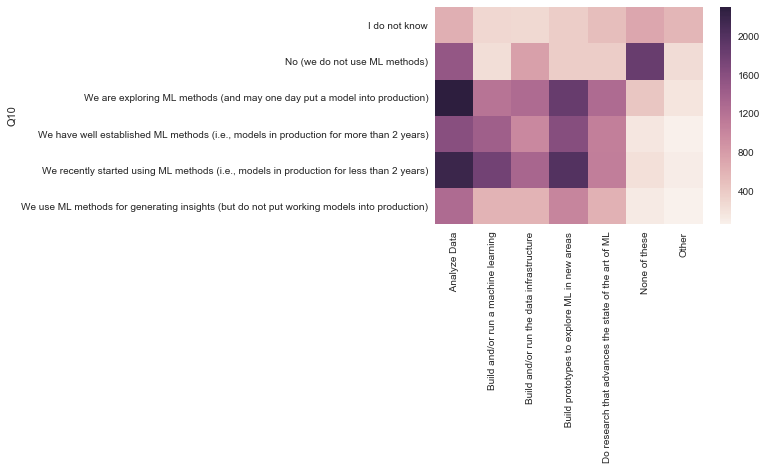

In [467]:
 ML_adoption = multiplechoice_orig[['Q10', 'Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3',
       'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6', 'Q11_Part_7']]
ML_adoption.rename(columns = {'Q11_Part_1': ' Analyze Data', 'Q11_Part_2': 'Build and/or run a machine learning', 'Q11_Part_3': 'Build and/or run the data infrastructure', 'Q11_Part_4': ' Build prototypes to explore ML in new areas', 'Q11_Part_5': 'Do research that advances the state of the art of ML', 'Q11_Part_6': 'None of these', 'Q11_Part_7': 'Other'}, inplace = True)
ML_adoption_group  = ML_adoption.groupby('Q10').count()
ML_adoption_group
ax = sns.heatmap(ML_adoption_group)

<Figure size 360x360 with 0 Axes>

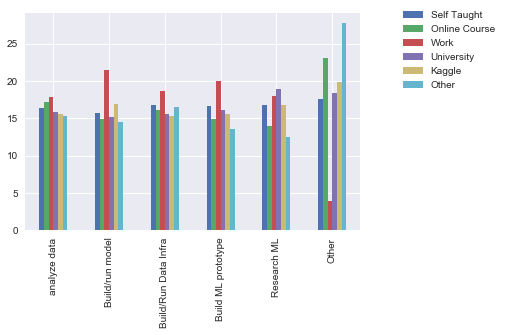

<Figure size 360x360 with 0 Axes>

In [546]:
#Responders who analyze data, Build and/or run a ML, Build and/or run the data infrastructure from where do they leanr ML?
# 
#role = multiplechoice_orig[['Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6']].dropna(thresh = 1)
#learn= multiplechoice_orig[['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)

analyze_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_1'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
analyze_learn = analyze_role.mean(axis = 0)
analyze_learn = pd.DataFrame(analyze_learn)
analyze_learn= analyze_learn.T

build_run_model_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_2'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
build_run_model_learn = build_run_model_role.mean(axis=0)
build_run_model_learn = pd.DataFrame(build_run_model_learn)
build_run_model_learn = build_run_model_learn.T

build_run_datainfra_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_3'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
build_run_datainfra_learn = build_run_datainfra_role.mean(axis=0)
build_run_datainfra_learn = pd.DataFrame(build_run_datainfra_learn)
build_run_datainfra_learn = build_run_datainfra_learn.T


build_ML_prototype_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_4'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
build_ML_prototype_learn = build_ML_prototype_role.mean(axis=0)
build_ML_prototype_learn = pd.DataFrame(build_ML_prototype_learn)
build_ML_prototype_learn = build_ML_prototype_learn.T

research_ML_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_5'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
research_ML_learn = research_ML_role.mean(axis=0)
research_ML_learn = pd.DataFrame(research_ML_learn)
research_ML_learn = research_ML_learn.T

none_role = multiplechoice_orig[~(multiplechoice_orig['Q11_Part_6'].isna())][['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5','Q35_Part_6']].dropna(thresh = 1)
none_learn = none_role.mean(axis=0)
none_learn = pd.DataFrame(none_learn)
none_learn = none_learn.T
role_learn = pd.concat([analyze_learn, build_run_model_learn, build_run_datainfra_learn, build_ML_prototype_learn, research_ML_learn, none_learn], axis =0)
role_learn = role_learn /role_learn.sum(axis = 0)
role_learn = role_learn * 100
role_learn.rename(columns = {'Q35_Part_1' : 'Self Taught', 'Q35_Part_2' : 'Online Course', 'Q35_Part_3': 'Work', 'Q35_Part_4': 'University', 'Q35_Part_5': 'Kaggle', 'Q35_Part_6': 'Other'}, inplace = True)

ax = role_learn.plot(kind='bar')
ax.set(xticklabels = ['analyze data', 'Build/run model', 'Build/Run Data Infra', 'Build ML prototype', 'Research ML', 'Other'])
ax.legend(bbox_to_anchor=(1.1, 1.05))
 

from matplotlib.pyplot import figure
figure(figsize=(5,5))

C:\Users\ravi_\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'Local or hosted development environments (RStudio, JupyterLab, etc.)'),
 Text(0,0,'Basic statistical software (Microsoft Excel, Google Sheets, etc.)'),
 Text(0,0,'Other'),
 Text(0,0,'Advanced statistical software (SPSS, SAS, etc.)'),
 Text(0,0,'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'),
 Text(0,0,'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)')]

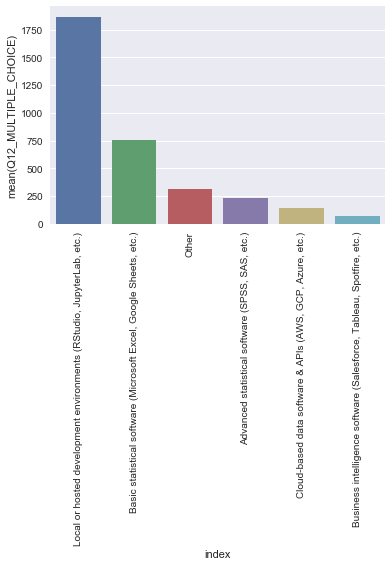

In [565]:
student_tools = multiplechoice_orig[multiplechoice_orig['Q7'] =='I am a student']['Q12_MULTIPLE_CHOICE']
value_table = pd.DataFrame(student_tools.value_counts().reset_index())
value_table.columns
ax = sns.barplot(x = 'index', y= 'Q12_MULTIPLE_CHOICE', data=value_table)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0,0.5,'Percentage')

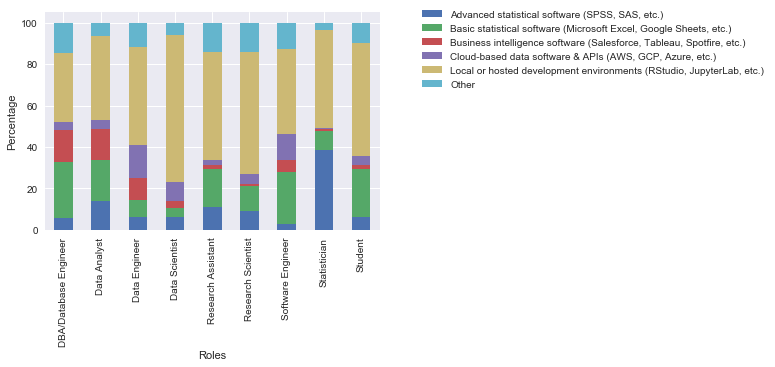

In [690]:
#student_tools = multiplechoice_orig[multiplechoice_orig['Q7'] =='I am a student'][['Q6', 'Q12_MULTIPLE_CHOICE']]
student_tools = multiplechoice_orig[['Q6', 'Q12_MULTIPLE_CHOICE']]
student_tools = student_tools[student_tools['Q6'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer', 'Software Engineer', 'Statistician', 'DBA/Database Engineer', 'Research Scientist', 'Research Assistant', 'Student'])]
student_tools_group = pd.DataFrame(student_tools.groupby(['Q6', 'Q12_MULTIPLE_CHOICE']).size().reset_index())
student_tools_group = student_tools_group.pivot(index = 'Q6', columns= 'Q12_MULTIPLE_CHOICE')
student_tools_group.columns = student_tools_group.columns.droplevel(0)
student_tools_group.fillna(0, inplace = True)
student_tools_sum = pd.DataFrame(student_tools_group.sum(axis = 1).values)
student_tools_group = student_tools_group.apply(pd.to_numeric)
student_tools_per = pd.DataFrame((student_tools_group.values / student_tools_sum.values) * 100)
student_tools_per.columns = student_tools_group.columns.values
ax = student_tools_per.plot.bar(stacked=True)


x = np.array(np.arange(0, 9))
ax.set_xticklabels(['DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Research Assistant', 'Research Scientist',
       'Software Engineer', 'Statistician', 'Student'] )

ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel('Roles')
ax.set_ylabel('Percentage')

In [819]:
IDE = multiplechoice_orig[['Q6', 'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11','Q13_Part_12','Q13_Part_13']]
IDE.columns = ['Q6', 'Jupyter/IPython', 'RStudio', 'PyCharm', 'Visual Studio Code', 'nteract', 'Atom','MATLAB', 'Visual Studio', 'Notepad++', 'Sublime', 'Vim', 'IntelliJ', 'Spyder']
student_tools = IDE[IDE['Q6'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer', 'Software Engineer', 'Statistician', 'DBA/Database Engineer', 'Research Scientist', 'Research Assistant', 'Student'])]
student_tools.groupby('Q6').agg('count')


,Jupyter/IPython,RStudio,PyCharm,Visual Studio Code,nteract,Atom,MATLAB,Visual Studio,Notepad++,Sublime,Vim,IntelliJ,Spyder
Q6,,,,,,,,,,,,,
DBA/Database Engineer,88,56,38,40,0,25,24,55,84,36,24,26,36
Data Analyst,1084,1002,478,299,7,256,342,342,695,378,175,132,465
Data Engineer,497,246,283,206,4,142,151,168,297,224,194,198,148
Data Scientist,3191,2119,1656,856,50,826,955,739,1447,1342,975,628,1277
Research Assistant,377,204,201,114,5,112,267,136,209,172,147,90,157
Research Scientist,770,443,405,234,5,172,464,232,367,270,290,136,294
Software Engineer,1806,626,1102,1177,14,625,619,1079,1273,981,845,891,455
Statistician,123,177,27,28,0,18,62,34,64,27,14,4,51
Student,2770,1375,1579,1082,17,900,1630,1137,1465,1383,861,755,1201


No handles with labels found to put in legend.
C:\Users\ravi_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


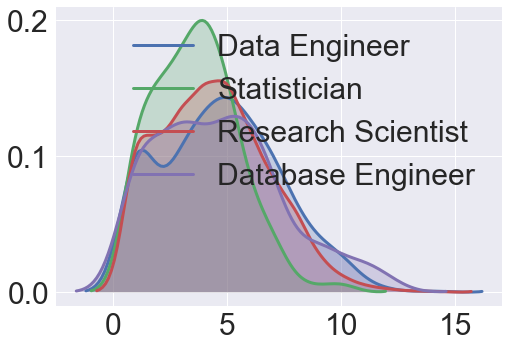

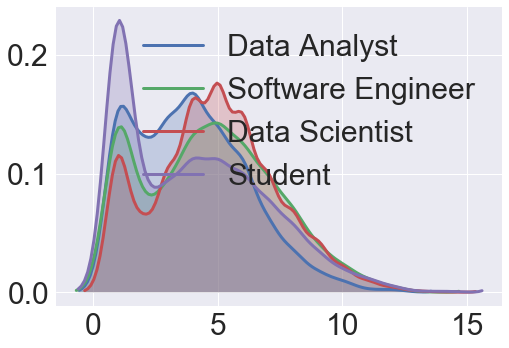

In [820]:
sns.set(font_scale=3, rc={"lines.linewidth": 3.0})  
ax = plt.subplots()
#fig = plt.figure(figsize = (30, 20))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_xticks(np.arange(0, 15, step=0.2))
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Data Engineer'].isna())).sum(axis=1).values, shade = True, label = 'Data Engineer')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Statistician'].isna())).sum(axis=1).values, shade = True, label = 'Statistician')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Research Scientist'].isna())).sum(axis=1).values, shade = True, label = 'Research Scientist')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'DBA/Database Engineer'].isna())).sum(axis=1).values, shade = True, label = 'Database Engineer')
plt.show()

sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Data Analyst'].isna())).sum(axis=1).values, shade = True, label = 'Data Analyst')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Software Engineer'].isna())).sum(axis=1).values, shade = True, label = 'Software Engineer')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Data Scientist'].isna())).sum(axis=1).values, shade=True, label = 'Data Scientist')
sns.kdeplot((~(student_tools[student_tools['Q6'] == 'Student'].isna())).sum(axis=1).values, shade = True, label = 'Student')
plt.show()
#plt.legend(loc='upper left')


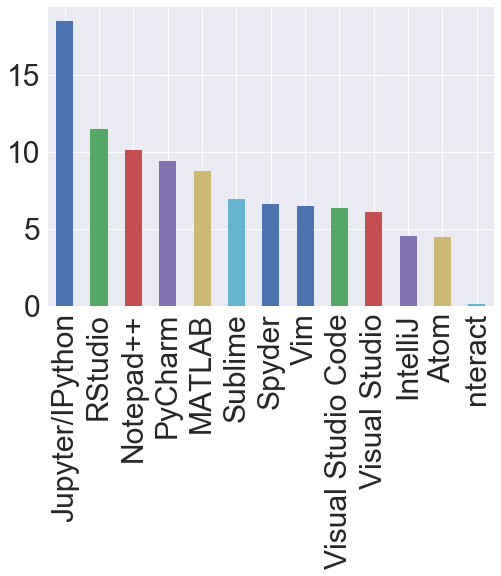

In [834]:
group1 = student_tools[student_tools['Q6'].isin(['Data Engineer',  'Statistician', 'DBA/Database Engineer', 'Research Scientist'])]
group1_tools = (~(group1.isna())).sum(axis=0).sort_values(ascending = False)
# Top 5 tools 
group1_tools = group1_tools[1:].copy()

group1_tools /= group1_tools.sum()
group1_tools *= 100
group1_tools.plot.bar()

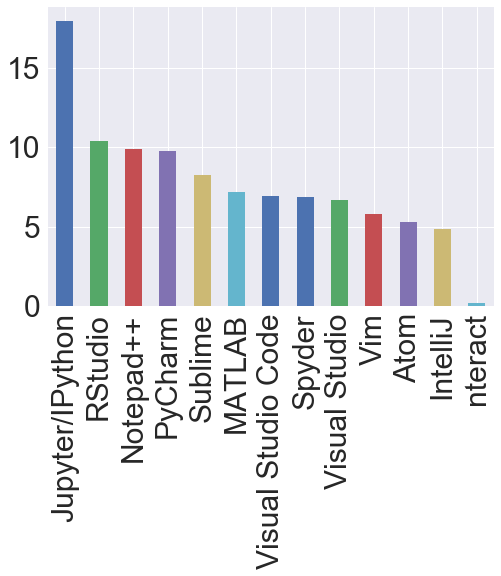

In [836]:
group2 = student_tools[student_tools['Q6'].isin(['Data Analyst',  'Software Engineer', 'Data Scientist', 'Student'])]
group2_tools = (~(group2.isna())).sum(axis=0).sort_values(ascending = False)
# Top 5 tools 
group2_tools = group2_tools[1:].copy()

group2_tools /= group2_tools.sum()
group2_tools *= 100
group2_tools.plot.bar()

C:\Users\ravi_\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


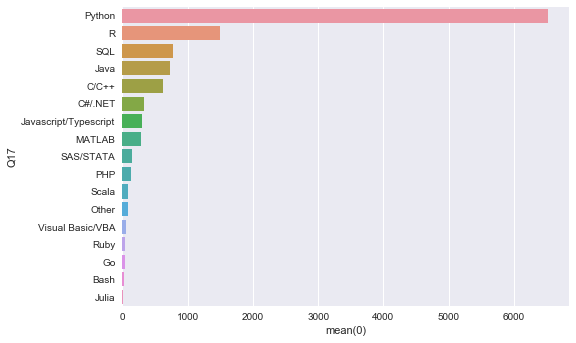

In [864]:
language_role = multiplechoice_orig[['Q6', 'Q17']]
language_role = language_role[language_role['Q6'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer', 'Software Engineer', 'Statistician', 'DBA/Database Engineer', 'Research Scientist', 'Research Assistant', 'Student'])]
language_role_group = pd.DataFrame(language_role.groupby(['Q17', 'Q6']).size().reset_index())
language_role_group = language_role_group.pivot(index = 'Q6', columns= 'Q17')
#student_tools_group.columns = student_tools_group.columns.droplevel(0)
language_role_group = language_role_group.fillna(0)
language_role_group = pd.DataFrame(language_role_group.sum(axis = 0).sort_values(ascending = False).reset_index())
sns.set(font_scale=1)
sns.barplot(x = 0, y='Q17', data = language_role_group)

In [865]:

language_role_group.head()

,level_0,Q17,0
0,0,Python,6516.0
1,0,R,1496.0
2,0,SQL,780.0
3,0,Java,734.0
4,0,C/C++,627.0
